In [1]:
from IPython.display import display, Math, Latex
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import random as r
from datetime import datetime
import matplotlib.dates as mdates
import requests

In [2]:
# ENTER STUDENT ID HERE
ticker_str = "BTO.TO"
print(ticker_str)

# DO NOT MODIFY
start_date = '2022-01-01'
end_date = '2023-01-01'

BTO.TO


In [3]:
BTO = yf.Ticker(ticker_str)
bco_full_data = BTO.info
companies = pd.read_csv("interlisted-companies.csv")
name = companies.loc[companies['CAD Symbol'] == ticker_str]
city =  bco_full_data["city"]
state = bco_full_data["state"]
country = bco_full_data["country"]
location = "{},{},{}".format(city,country,state)
Bto_data = pd.DataFrame({"Company Name": name['Name'],
                        "Domestic Ticker": name["CAD Symbol"],
                        "Industry": bco_full_data['industry'],
                        "Sector": bco_full_data["sector"],
                        "Website": bco_full_data["website"],     
                        "Location": location,
                        "Domestic Stock Exchange": bco_full_data['exchange'],
                        "Foreign Stock Exchange": name.get('International Market'),
                        "Foregin Ticker": name.get("US Symbol")})
foreign_name = Bto_data["Foregin Ticker"].iloc[0]

In [4]:
Bto_data

,Company Name,Domestic Ticker,Industry,Sector,Website,Location,Domestic Stock Exchange,Foreign Stock Exchange,Foregin Ticker
139,B2Gold Corp.,BTO.TO,Gold,Basic Materials,https://www.b2gold.com,"Vancouver,Canada,BC",TOR,NYSE MKT,BTG


In [165]:
CAD_USD = yf.Ticker("CADUSD=X")
currency_history = CAD_USD.history(start=start_date, end = end_date, auto_adjust=False)
currency_history.index = currency_history.index.strftime("%Y-%m-%d")
currency_history.index = pd.to_datetime(currency_history.index)
currency_history['Rate'] = currency_history['Close']
currency_history.head()

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,Rate
Date,,,,,,,,,
2022-01-03,0.790070,0.790889,0.782589,0.789964,0.789964,0,0.0,0.0,0.789964
2022-01-04,0.784228,0.789440,0.783355,0.784234,0.784234,0,0.0,0.0,0.784234
2022-01-05,0.787185,0.787954,0.784979,0.787129,0.787129,0,0.0,0.0,0.787129
2022-01-06,0.783846,0.786003,0.780439,0.783693,0.783693,0,0.0,0.0,0.783693
2022-01-07,0.785737,0.790977,0.785571,0.785534,0.785534,0,0.0,0.0,0.785534


In [166]:
# domestic: BTO.TO
domestic = yf.Ticker(ticker_str)
# foreign: BTG
foreign =  yf.Ticker(Bto_data["Foregin Ticker"].iloc[0])

domestic = domestic.history(start = start_date, end = end_date)
foreign = foreign.history(start = start_date, end = end_date)

domestic.index = domestic.index.strftime("%Y-%m-%d")
foreign.index = foreign.index.strftime("%Y-%m-%d")

domestic.index = pd.to_datetime(domestic.index)
foreign.index = pd.to_datetime(foreign.index)

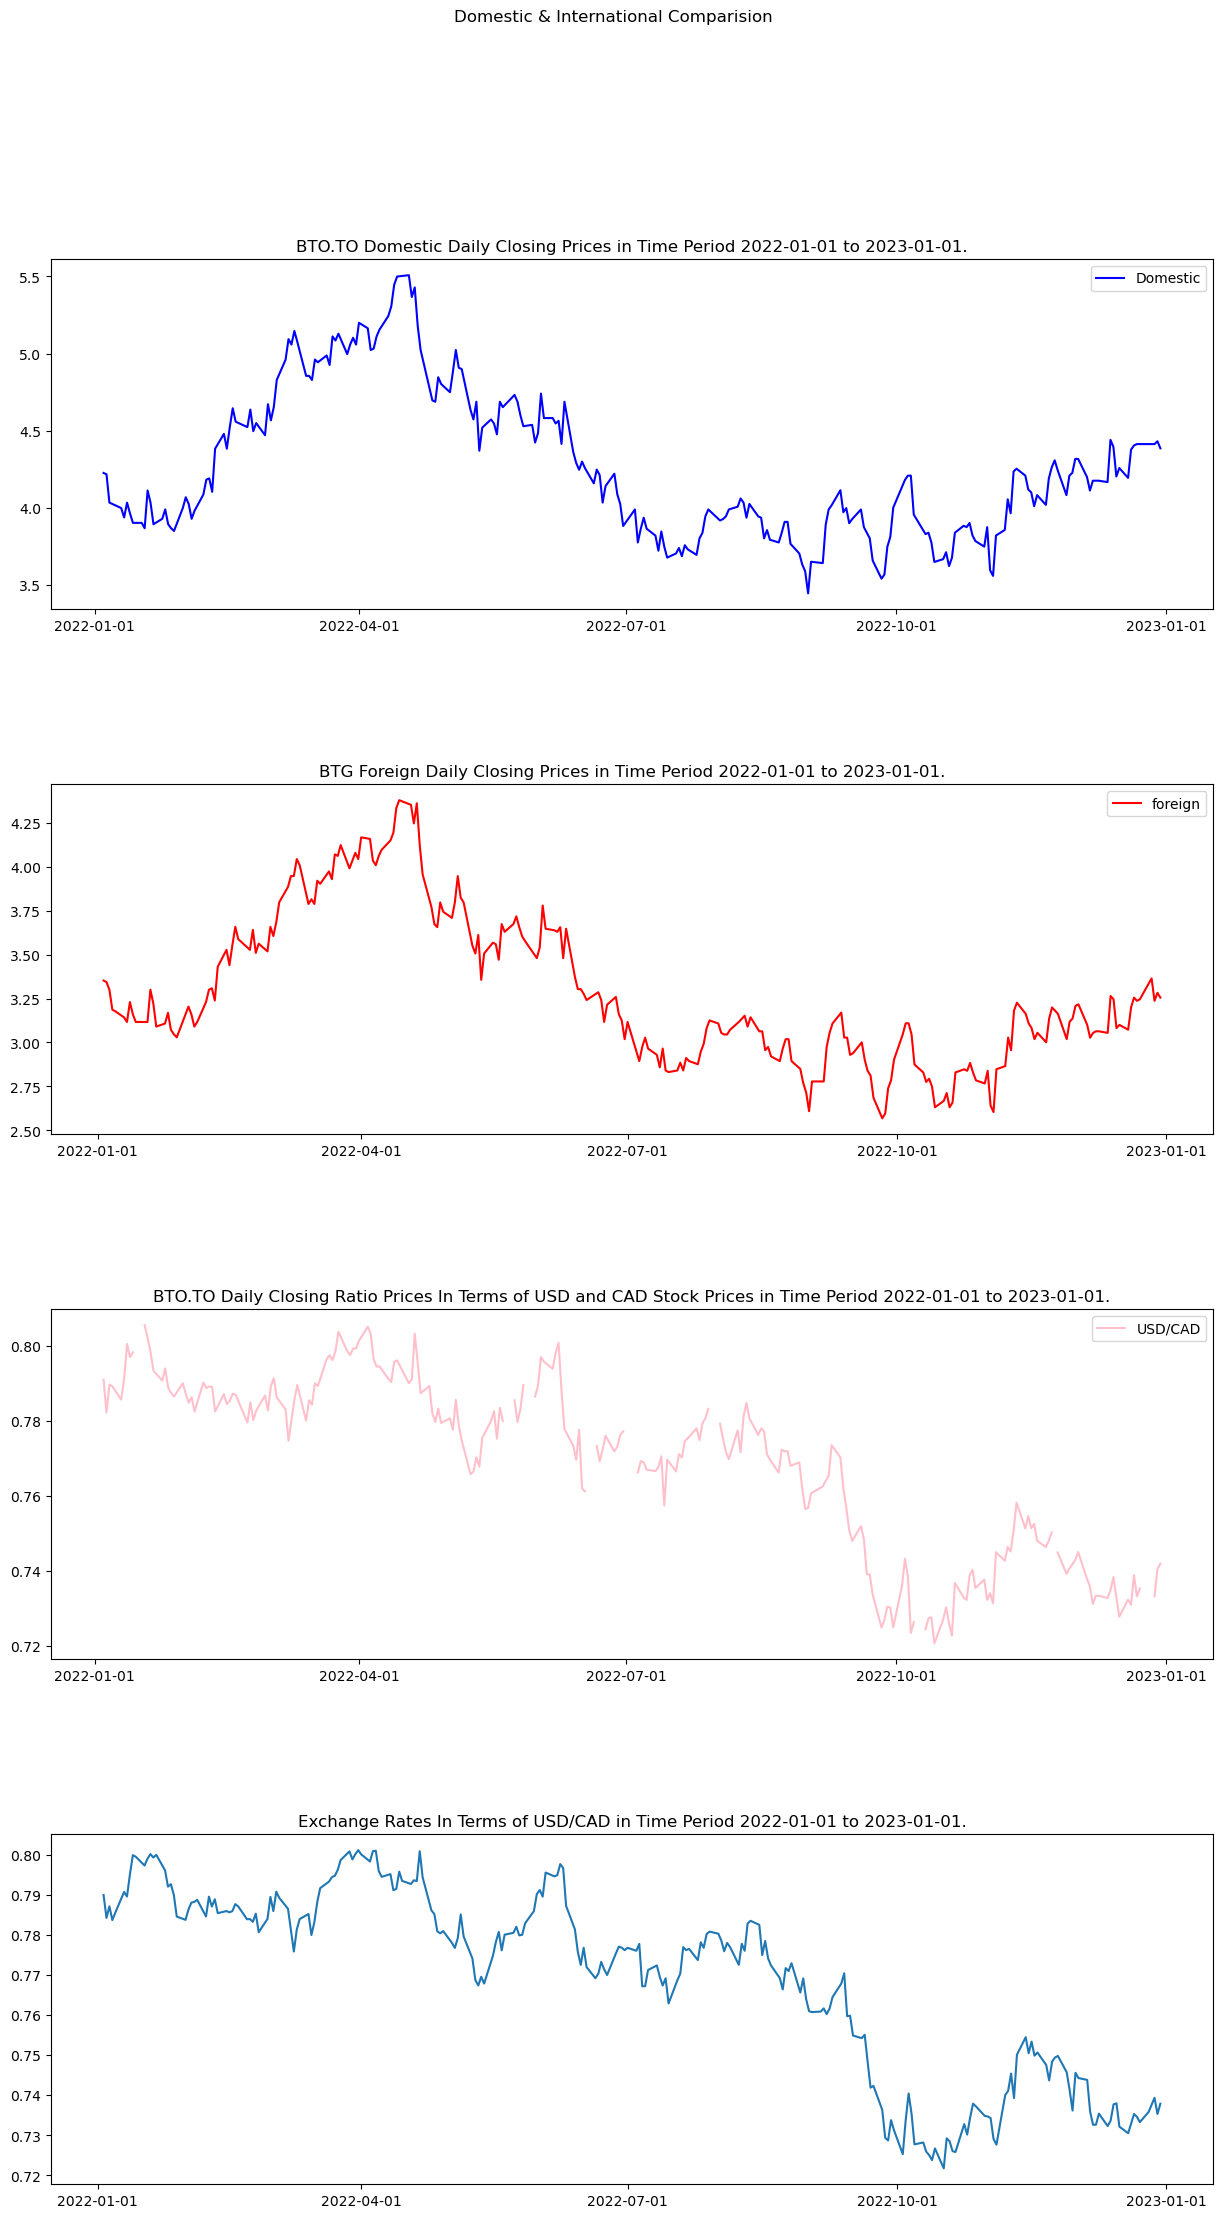

In [167]:
# A 4 by 1 subplot includes:
# 1. Closing Price for domestic 
# 2. Closing Price for foreign 
# 3. Difference (USD / CAD)
# 4. the exchange from the two countries 

# NOTE: 
# 1.Plot First
# 2.Set Ticks and Formatting Next
# 3. Add Labels and Titles
# 4. Adjust Layout and Display

# concating:
combined = pd.concat([domestic['Close'], foreign['Close']], axis =1, keys = ['Domestic', 'Foreign'])
combined['Gap'] = combined['Foreign'] / combined['Domestic']
UsCad = pd.DataFrame(combined['Gap'])


dates = pd.date_range(start = start_date, end = end_date, freq = '3MS')

domestic_closing = domestic['Close']
foreign_closing = foreign['Close']



fig, ((ax1), (ax2), (ax3), (ax4)) = plt.subplots(4, 1)
fig.set_size_inches(15,25)
fig.suptitle("Domestic & International Comparision")

ax1.set_title(f"{ticker_str} Domestic Daily Closing Prices in Time Period {start_date} to {end_date}.")
ax1.plot(domestic.index, domestic['Close'], label='Domestic', color='blue')
ax1.set_xticks(dates)
ax1.set_xticklabels(dates.strftime('%Y-%m-%d'))
ax1.legend(loc='best')


ax2.set_title(f"{foreign_name} Foreign Daily Closing Prices in Time Period {start_date} to {end_date}.")
ax2.plot(foreign.index, foreign_closing, label = "foreign", color = 'red')
ax2.set_xticks(dates)
ax2.set_xticklabels(dates.strftime("%Y-%m-%d"))
ax2.legend(loc='best')


ax3.set_title(f"{ticker_str} Daily Closing Ratio Prices In Terms of USD and CAD Stock Prices in Time Period {start_date} to {end_date}.")
ax3.plot(UsCad.index, UsCad['Gap'], label = 'USD/CAD', color = 'pink')
ax3.set_xticks(dates)
ax3.set_xticklabels(dates.strftime("%Y-%m-%d"))
ax3.legend(loc = 'best')

ax4.set_title(f"Exchange Rates In Terms of USD/CAD in Time Period {start_date} to {end_date}.")
ax4.plot(currency_history.index, currency_history['Close'])
ax4.set_xticks(dates)
ax4.set_xticklabels(dates.strftime("%Y-%m-%d"))

plt.subplots_adjust(hspace=0.5)

plt.show()

In [204]:
CAD_implied = pd.DataFrame(foreign['Close'] * (1 / currency_history['Rate']))
CAD_implied.rename(columns={CAD_implied.columns[0]: 'CAD Implied Close Price'}, inplace=True)


USD_Close = foreign[['Close']]
exchange_rate = currency_history['Rate']

df = pd.concat([USD_Close, exchange_rate, CAD_implied, domestic['Close']], join = 'inner', axis =1)
df.columns = ['USD Close Price', 'Exchange Rate', 'CAD Implied Close', 'CAD actual Close']
df.head()

,USD Close Price,Exchange Rate,CAD Implied Close,CAD actual Close
Date,,,,
2022-01-04,3.343507,0.784234,4.263407,4.227298
2022-01-05,3.299859,0.787129,4.192272,4.218563
2022-01-06,3.186371,0.783693,4.065841,4.035147
2022-01-07,3.177641,0.785534,4.045201,4.026413
2022-01-10,3.142722,0.790708,3.974570,4.000212


In [205]:
deviation = df['CAD actual Close'] - df['CAD Implied Close']
deviation = pd.DataFrame(deviation)
deviation.rename(columns = {deviation.columns[0]: "Deviation"}, inplace = True)

avg_deviation = np.round(deviation["Deviation"].mean(),4)
std_deviation = np.round(deviation["Deviation"].std(),4)
median_deviation = np.round(deviation["Deviation"].median(),4)
print("The average deviation is {}".format(avg_deviation))
print("The standard deviation is {}".format(std_deviation))
print("The median deviation is {}".format(median_deviation))

The average deviation is 0.0016
The standard deviation is 0.0265
The median deviation is 0.0011


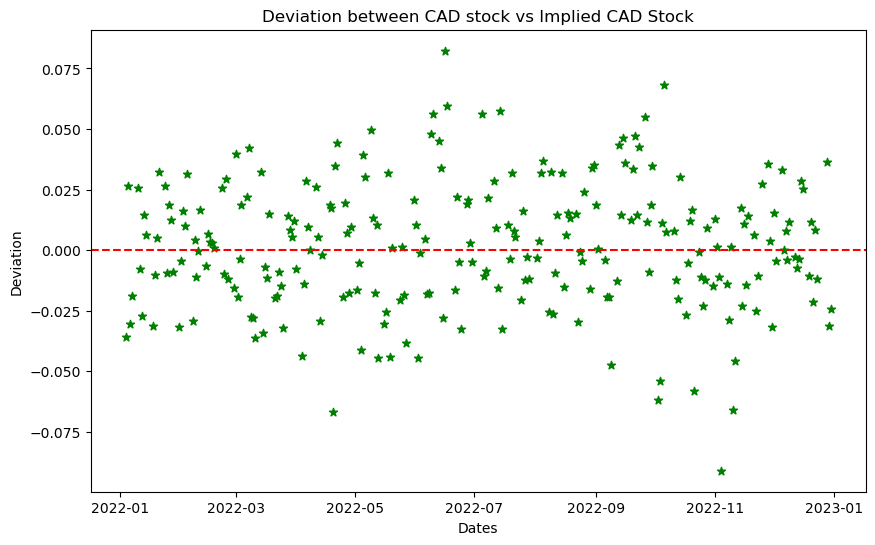

In [206]:
plt.figure(figsize = (10,6))
plt.scatter(deviation.index, deviation, color = 'green', marker ='*')
plt.xlabel("Dates")
plt.ylabel("Deviation")
plt.title("Deviation between CAD stock vs Implied CAD Stock")
plt.axhline(y=0, color = 'red', linestyle = '--')

The Scatter Plot above shows the deviations between the actual CAD stock price and the CAD stock price converted by USD over time. The red dashline at y = 0 serves as a benchmark, indicating that there is no deviation exist, that is NO potential arbitrage opportunities. When deviations are far from 0, it would indicate a mispricing between buying in the domestic market and in the foreign market, which could lead to arbitrage opportunities.

In [227]:
num_shares = 100000
daily_deviation = pd.DataFrame(deviation)
# Can either 
daily_deviation['Profit Per USD'] = abs(daily_deviation['Deviation'] / df['Exchange Rate'])
daily_deviation['Daily_Profit_USD'] = daily_deviation['Profit Per USD'] * num_shares
total_sum = daily_deviation['Daily_Profit_USD'].sum()
print("The total amount of profit available is {}".format(total_sum))

The total amount of profit available is 673525.4817862257


In [228]:
daily_deviation

,Deviation,Profit Per USD,Daily_Profit_USD
Date,,,
2022-01-04,-0.036109,0.046043,4604.335366
2022-01-05,0.026290,0.033400,3340.020454
2022-01-06,-0.030694,0.039166,3916.622584
2022-01-07,-0.018788,0.023918,2391.764181
2022-01-10,0.025642,0.032429,3242.928684
...,...,...,...
2022-12-22,0.008176,0.011130,1112.964067
2022-12-23,-0.012059,0.016444,1644.441925
2022-12-28,0.036562,0.049450,4945.042015
